In [2]:
from pathlib import Path
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import re
from gelgenie.segmentation.helper_functions.general_functions import create_dir_if_empty, index_converter
from collections import defaultdict
import pickle
import math
from scipy.stats import linregress
import pingouin
#plt.rcParams.update({'font.sans-serif':'Helvetica'})  # consistent figure formatting

C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
fig2a_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_2_A_band_data.csv')
fig2b_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_2_B_band_data.csv')
fig2c_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_2_C_band_data.csv')
fig2d_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_2_D_band_data.csv')
figs1A_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_s1_A_band_data.csv')
figs1C_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_s1_C_band_data.csv')
figs9A_1_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_s9_A_band_data.csv')
figs9A_2_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_s9_A_band_data_2.csv')
Modification_required = [False, True, False, True, False, False, False, False]

# # minor mods required for no-band areas
# arun_2022_fig1f = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_2022_toehold_clipping/GelGenie Analysis/fig_1F.csv')

# # minor mods required for no-band areas
# arun_2022_fig3f_1 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_1.csv')
# arun_2022_fig3f_2 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_2.csv')
# arun_2022_fig3f_3 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_3.csv')

# # finetune model required - minor mods/additions needed for no-band areas
# arun_2021_multiplexed_1 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/fig2c_1.csv')
# arun_2021_multiplexed_2 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/fig2c_2.csv')
# arun_2021_multiplexed_3 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/fig2c_3.csv')

# # finetune model required - minor mods/additions needed for no-band areas
# arun_2021_multiplexed_4f_dna = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/fig4f_dna.csv')
# arun_2021_multiplexed_4f_rna = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/fig4f_rna.csv')
# arun_2021_multiplexed_4f_dig = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/fig4f_dig.csv')
# arun_2021_multiplexed_4f_sa = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/fig4f_sa.csv')

# # finetune model required - minor mods/additions needed for no-band areas
# arun_2021_multiplexed_S4 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/figS4.csv')
# arun_2021_multiplexed_S4_auto = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/figS4_auto.csv')

# # finetune model required - minor mods/additions needed for no-band areas
# arun_2021_multiplexed_S5_1 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/figS5_1.csv')
# arun_2021_multiplexed_S5_2 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/figS5_2.csv')
# arun_2021_multiplexed_S5_3 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_multiplexed_2021/GelGenie Analysis/figS5_3.csv')

# # major changes necessary - many bands missed (out-of-distribution data)
# arun_2016_nucleic_acid_sensor = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_nucleic_acid_sensor_2016/GelGenie Analysis/figS3A.csv')

# # major changes necessary - many bands missed (out-of-distribution data)
# miracles_2b_1 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_miracles_2019/GelGenie Analysis/fig2B_1.csv')
# miracles_2b_2 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_miracles_2019/GelGenie Analysis/fig2B_2.csv')
# miracles_2b_3 = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_miracles_2019/GelGenie Analysis/fig2B_3.csv')

# # major changes necessary - many bands missed (out-of-distribution data)
# miracles_3f = pd.read_csv('/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/other_paper_comparisons/arun_data_miracles_2019/GelGenie Analysis/fig3F.csv')

## Multiplexed Paper

- previous analysis = analysis conducted in the paper
- gel genie = both raw volume and rolling ball corrected volume 
- always use rolling ball to compare to previous analysis as paper analyis involved background correction

### Figure 2a

In [4]:
figs1A_df.head()

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference,Previous Analysis
0,2,7,27246,4285,4.444444,67
1,3,3,25702,4159,1.111111,65
2,4,6,28748,4798,3.333333,84
3,6,6,45000,15390,11.111111,238
4,6,10,36813,5065,2.222222,97


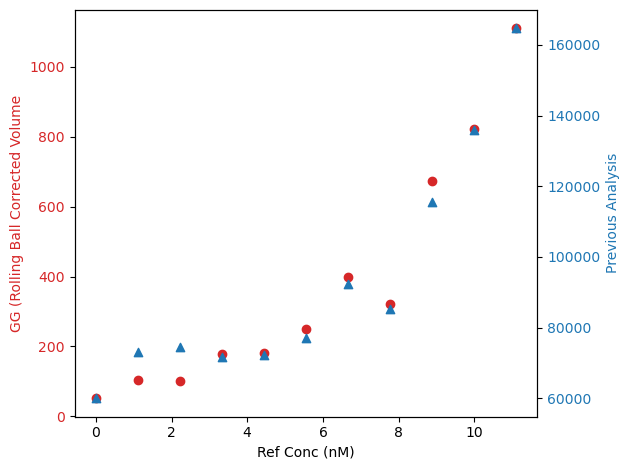

In [5]:
# plot to compare GG Rolling Ball Corrected Volume and Previous Paper Analysis

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG (Rolling Ball Corrected Volume', color=color)
ax1.scatter(fig2a_df['Reference'], fig2a_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Previous Analysis', color=color)  # we already handled the x-label with ax1
ax2.scatter(fig2a_df['Reference'], fig2a_df['Raw Volume'], color=color, marker='^') # changed marker for accessibility
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

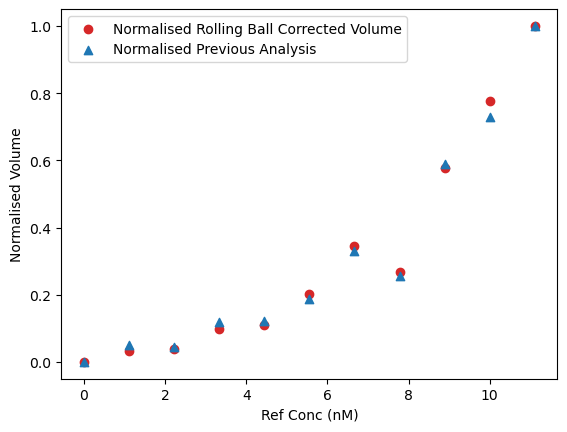

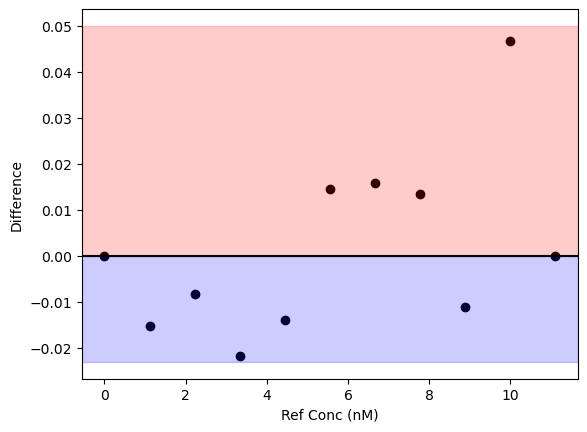

In [22]:
# normalise rolling ball corrected volume and previous analysis for comparison

# need to check if this is the best way to normalise the data
fig2a_df['Normalised Rolling Ball Corrected Volume'] = (fig2a_df['Rolling Ball Corrected Volume'] - fig2a_df['Rolling Ball Corrected Volume'].min()) / (fig2a_df['Rolling Ball Corrected Volume'].max() - fig2a_df['Rolling Ball Corrected Volume'].min())

fig2a_df['Normalised Previous Analysis'] = (fig2a_df['Previous Analysis'] - fig2a_df['Previous Analysis'].min()) / (fig2a_df['Previous Analysis'].max() - fig2a_df['Previous Analysis'].min())

plt.scatter(fig2a_df['Reference'], fig2a_df['Normalised Rolling Ball Corrected Volume'], label='Normalised Rolling Ball Corrected Volume', color='tab:red') 
plt.scatter(fig2a_df['Reference'], fig2a_df['Normalised Previous Analysis'], label='Normalised Previous Analysis', marker='^', color='tab:blue') 
plt.legend()
plt.xlabel('Ref Conc (nM)')
plt.ylabel('Normalised Volume')
plt.show()

# attempting to show the difference between the two normalised values
# the colour the point is in indicates which was better, i.e. red means GG was better to be consistent with previous plots
plt.scatter(fig2a_df['Reference'], fig2a_df['Normalised Rolling Ball Corrected Volume'] - fig2a_df['Normalised Previous Analysis'], color='black')
plt.xlabel('Ref Conc (nM)')
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Difference')
plt.axhspan(0, 0.05, alpha=0.2, color='red')
plt.axhspan(0, -0.023, alpha=0.2, color='blue')
plt.show()

# in all cases, the previous analysis is lower than the rolling ball corrected volume. This is likely due to the previous analysis not accounting for the background signal.

### Figure 2b

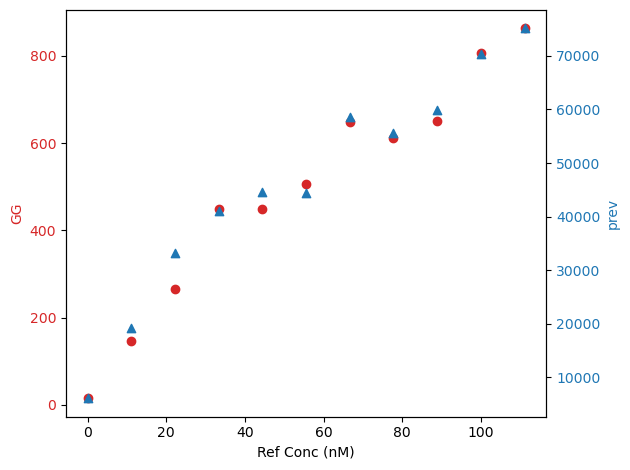

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
ax1.scatter(fig2b_df['Reference'], fig2b_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prev', color=color)  # we already handled the x-label with ax1
ax2.scatter(fig2b_df['Reference'], fig2b_df['Rolling Ball Corrected Volume'], color=color, marker='^')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Axes: >

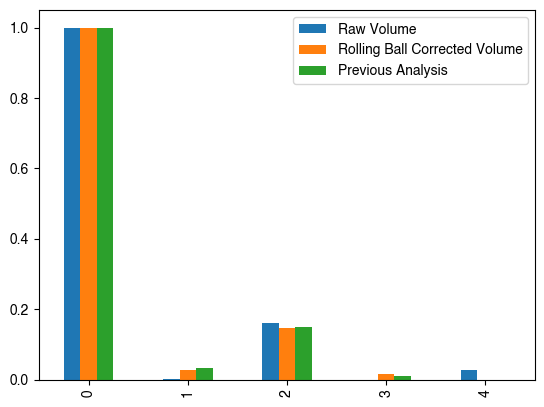

In [48]:
normalized_fig2c_df=(fig2c_df-fig2c_df.min())/(fig2c_df.max()-fig2c_df.min())
normalized_fig2c_df.drop(columns=['Lane ID', 'Band ID']).plot.bar()

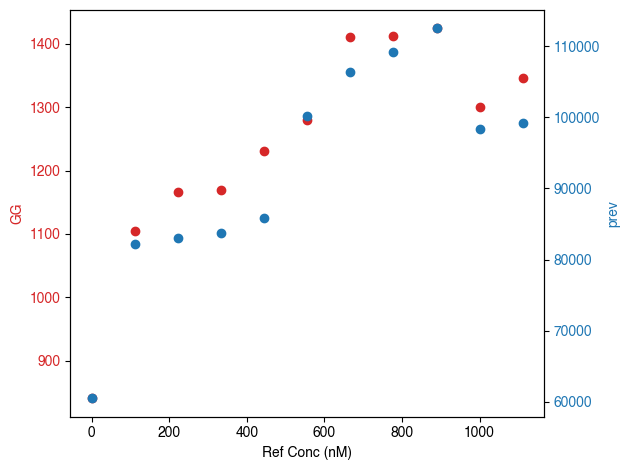

In [55]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
ax1.scatter(fig2d_df['Reference'], fig2d_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prev', color=color)  # we already handled the x-label with ax1
ax2.scatter(fig2d_df['Reference'], fig2d_df['Rolling Ball Corrected Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

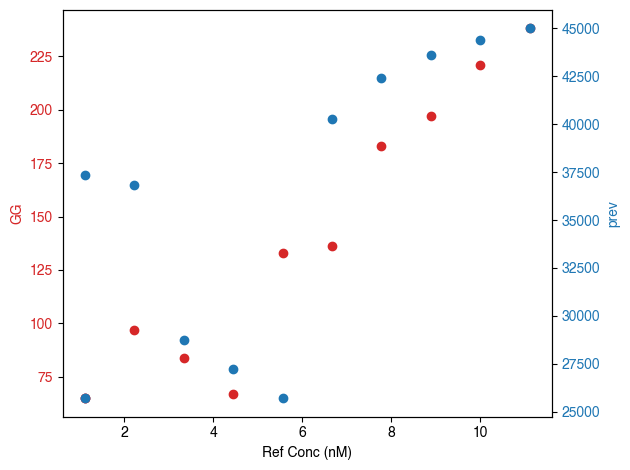

In [58]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
ax1.scatter(figs1A_df['Reference'], figs1A_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prev', color=color)  # we already handled the x-label with ax1
ax2.scatter(figs1A_df['Reference'], figs1A_df['Raw Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

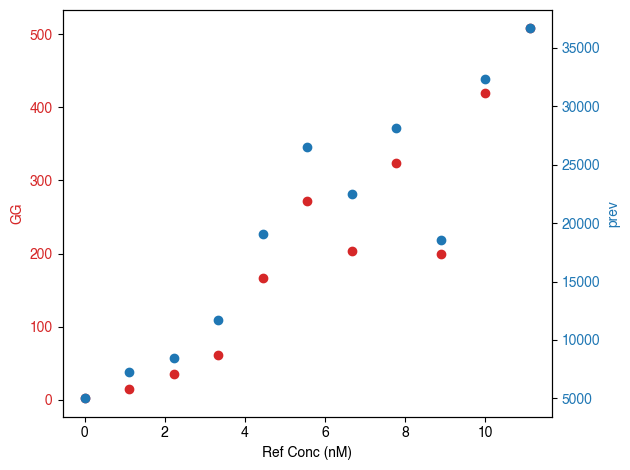

In [62]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
ax1.scatter(figs1C_df['Reference'], figs1C_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prev', color=color)  # we already handled the x-label with ax1
ax2.scatter(figs1C_df['Reference'], figs1C_df['Rolling Ball Corrected Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

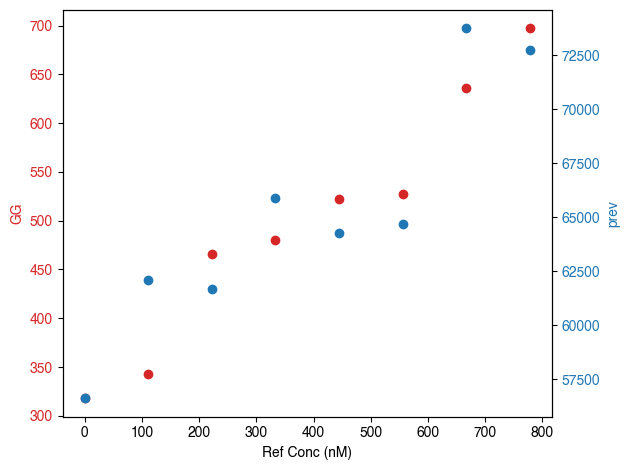

In [71]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
ax1.scatter(figs9A_1_df['Reference'], figs9A_1_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prev', color=color)  # we already handled the x-label with ax1
ax2.scatter(figs9A_1_df['Reference'], figs9A_1_df['Raw Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

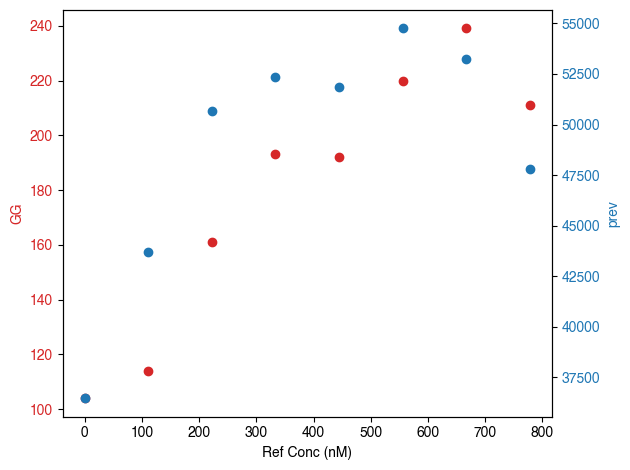

In [72]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
ax1.scatter(figs9A_2_df['Reference'], figs9A_2_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prev', color=color)  # we already handled the x-label with ax1
ax2.scatter(figs9A_2_df['Reference'], figs9A_2_df['Raw Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Arun 2022 Toehold Clipping

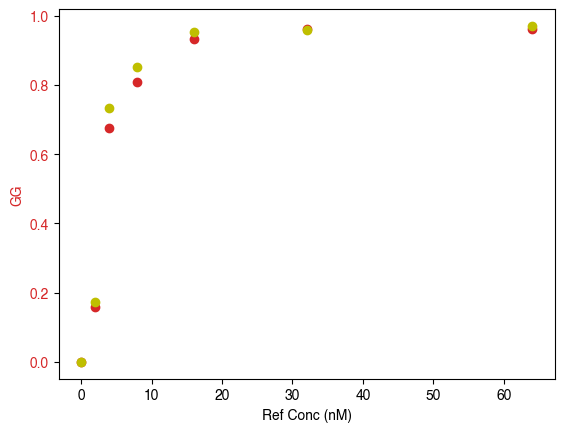

In [83]:
fig, ax1 = plt.subplots()

orig_data = np.array(arun_2022_fig1f['Original Analysis'])
gg_data = np.array(arun_2022_fig1f['Raw Volume'])
gg_data_bc = np.array(arun_2022_fig1f['Rolling Ball Corrected Volume'])

orig_data = (orig_data[0] - orig_data)/orig_data[0]
gg_data = (gg_data[0] - gg_data)/gg_data[0]
gg_data_bc = (gg_data_bc[0] - gg_data_bc)/gg_data_bc[0]

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
ax1.scatter(arun_2022_fig1f['Reference'], orig_data, color=color)
# ax1.scatter(arun_2022_fig1f['Reference'], gg_data, color='b')
ax1.scatter(arun_2022_fig1f['Reference'], gg_data_bc, color='y')

ax1.tick_params(axis='y', labelcolor=color)


<Axes: xlabel='Type', ylabel='Value'>

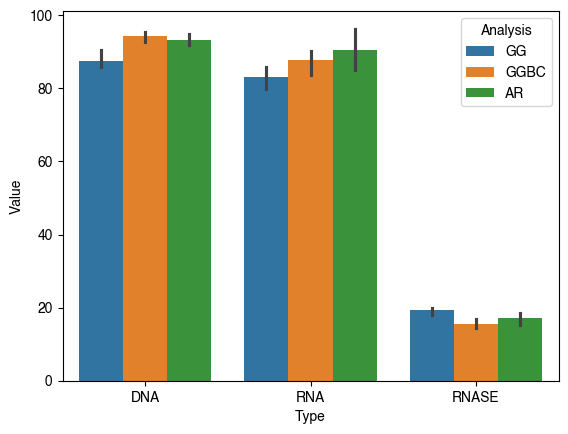

In [110]:
fig, ax1 = plt.subplots()

full_data = defaultdict(list)

for d in [arun_2022_fig3f_1, arun_2022_fig3f_2, arun_2022_fig3f_3]:

    full_data['Value'].append((100*d['Raw Volume'][0])/(d['Raw Volume'][0]+d['Raw Volume'][1]))
    full_data['Analysis'].append('GG')
    full_data['Type'].append('DNA')

    full_data['Value'].append((100*d['Raw Volume'][2])/(d['Raw Volume'][2]+d['Raw Volume'][3]))
    full_data['Analysis'].append('GG')
    full_data['Type'].append('RNA')
    
    full_data['Value'].append((100*d['Raw Volume'][4])/(d['Raw Volume'][4]+d['Raw Volume'][5]))
    full_data['Analysis'].append('GG')
    full_data['Type'].append('RNASE')

    full_data['Value'].append((100*d['Rolling Ball Corrected Volume'][0])/(d['Rolling Ball Corrected Volume'][0]+d['Rolling Ball Corrected Volume'][1]))
    full_data['Analysis'].append('GGBC')
    full_data['Type'].append('DNA')

    full_data['Value'].append((100*d['Rolling Ball Corrected Volume'][2])/(d['Rolling Ball Corrected Volume'][2]+d['Rolling Ball Corrected Volume'][3]))
    full_data['Analysis'].append('GGBC')
    full_data['Type'].append('RNA')

    full_data['Value'].append((100*d['Rolling Ball Corrected Volume'][4])/(d['Rolling Ball Corrected Volume'][4]+d['Rolling Ball Corrected Volume'][5]))
    full_data['Analysis'].append('GGBC')
    full_data['Type'].append('RNASE')

    full_data['Value'].append((100*d['Provided Analysis'][0])/(d['Provided Analysis'][0]+d['Provided Analysis'][1]))
    full_data['Analysis'].append('AR')
    full_data['Type'].append('DNA')

    full_data['Value'].append((100*d['Provided Analysis'][2])/(d['Provided Analysis'][2]+d['Provided Analysis'][3]))
    full_data['Analysis'].append('AR')
    full_data['Type'].append('RNA')

    full_data['Value'].append((100*d['Provided Analysis'][4])/(d['Provided Analysis'][4]+d['Provided Analysis'][5]))
    full_data['Analysis'].append('AR')
    full_data['Type'].append('RNASE')

full_data_df = pd.DataFrame.from_dict(full_data)

sns.barplot(x='Type', y='Value', hue='Analysis',data=full_data_df)

## Arun Multiplexed 2021

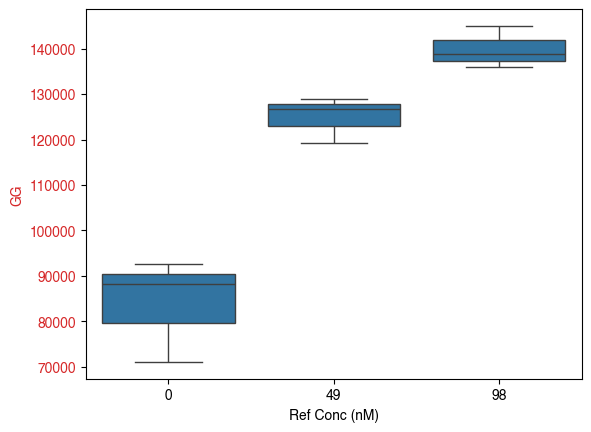

In [121]:
# fig 2C
fig, ax1 = plt.subplots()

full_df = pd.concat([arun_2021_multiplexed_1, arun_2021_multiplexed_2, arun_2021_multiplexed_3], ignore_index=True)

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
sns.boxplot(data=full_df[full_df['Reference'] < 100], x='Reference', y='Rolling Ball Corrected Volume')

ax1.tick_params(axis='y', labelcolor=color)

# need to think about how to present this data - perhaps by calculating the LOD or just simply the same scatter chart with error bars that Arun did?


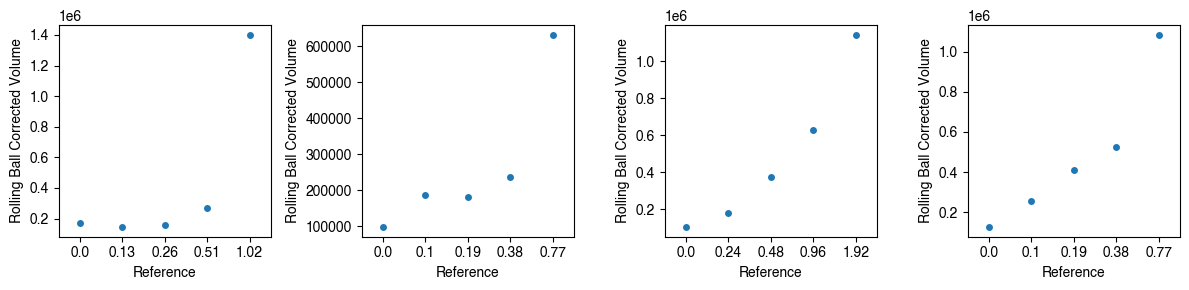

In [139]:
# fig 4f

arun_2021_multiplexed_4f_sa 

fig, axs = plt.subplots(1, 4, figsize=(12,3))

# axs[0].bar(arun_2021_multiplexed_4f_dig['Reference'], arun_2021_multiplexed_4f_dig['Rolling Ball Corrected Volume'])
sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_dig, ax=axs[0])
# sns.stripplot(x='Reference', y='Raw Volume', data=arun_2021_multiplexed_4f_dig, ax=axs[0])

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_rna, ax=axs[1])
# sns.stripplot(x='Reference', y='Raw Volume', data=arun_2021_multiplexed_4f_rna, ax=axs[1])

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_dna, ax=axs[2])
# sns.stripplot(x='Reference', y='Raw Volume', data=arun_2021_multiplexed_4f_dna, ax=axs[2])

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_sa, ax=axs[3])
# sns.stripplot(x='Reference', y='Raw Volume', data=arun_2021_multiplexed_4f_sa, ax=axs[3])

plt.tight_layout()

[1.         0.59285937]
[1.         0.12551765]
[1.         0.06949726]
[1.         0.11732689]


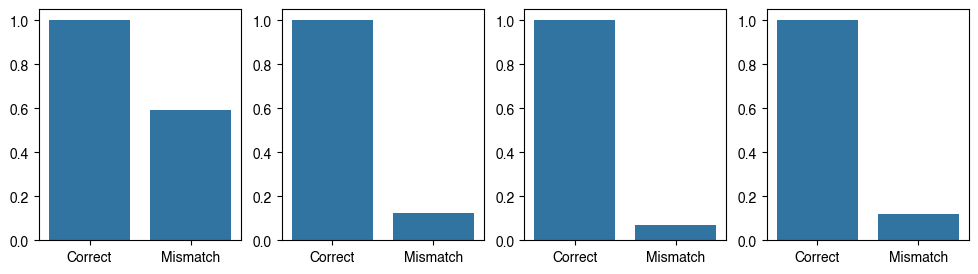

In [174]:
# fig S4

arun_2021_multiplexed_S4

fig, axs = plt.subplots(1, 4, figsize=(12,3))
cat_axis = ['Correct','Mismatch']

for ind, ax in enumerate(axs):
    data = np.array(arun_2021_multiplexed_S4.iloc[ind*2:(ind*2)+2]['Rolling Ball Corrected Volume'])
    data = data/data[0]
    print(data)
    sns.barplot(y=data,x=cat_axis,ax=ax)


[1.        0.6035955]
[1.         0.19519201]
[1.         0.08397906]
[1.         0.15101193]


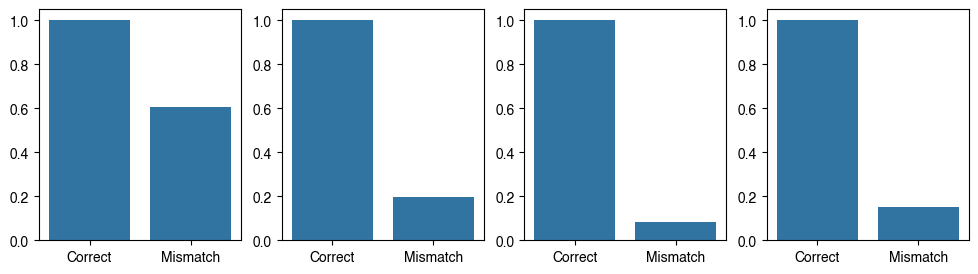

In [178]:
# fig S4-auto
arun_2021_multiplexed_S4

fig, axs = plt.subplots(1, 4, figsize=(12,3))
cat_axis = ['Correct','Mismatch']

for ind, ax in enumerate(axs):
    data = np.array(arun_2021_multiplexed_S4_auto.iloc[ind*2:(ind*2)+2]['Rolling Ball Corrected Volume'])
    data = data/data[0]
    print(data)
    sns.barplot(y=data,x=cat_axis,ax=ax)


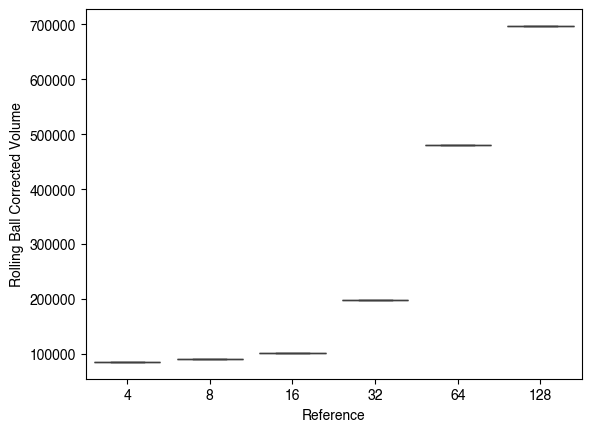

In [204]:
# Fig S5

fig, ax1 = plt.subplots()

full_df = pd.concat([arun_2021_multiplexed_S5_1, arun_2021_multiplexed_S5_1, arun_2021_multiplexed_S5_1], ignore_index=True)

b = sns.boxplot(data=full_df[full_df['Reference']>3], x='Reference', y='Rolling Ball Corrected Volume')

# ax1.tick_params(axis='y', labelcolor=color)

# DATA IS LINEAR BUT FOR SOME REASON DISPLAY IS WEIRD - NEED TO INVESTIGATE

In [200]:
arun_2021_multiplexed_S5_1

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference
0,1,1,390897,73883,0
1,2,1,403445,85661,2
2,3,1,428108,85431,4
3,4,1,439450,91168,8
4,5,1,456098,102514,16
5,6,1,571051,198015,32
6,7,1,886008,481094,64
7,8,1,1140455,697163,128


In [207]:
full_df

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference
0,1,1,390897,73883,0
1,2,1,403445,85661,2
2,3,1,428108,85431,4
3,4,1,439450,91168,8
4,5,1,456098,102514,16
5,6,1,571051,198015,32
6,7,1,886008,481094,64
7,8,1,1140455,697163,128
8,1,1,390897,73883,0
9,2,1,403445,85661,2


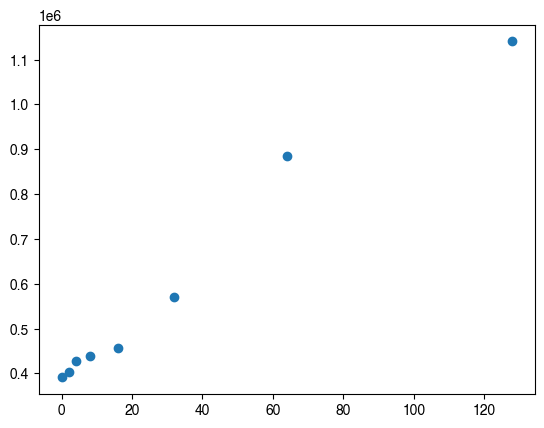

In [205]:
plt.scatter(arun_2021_multiplexed_S5_1['Reference'], arun_2021_multiplexed_S5_1['Raw Volume'])

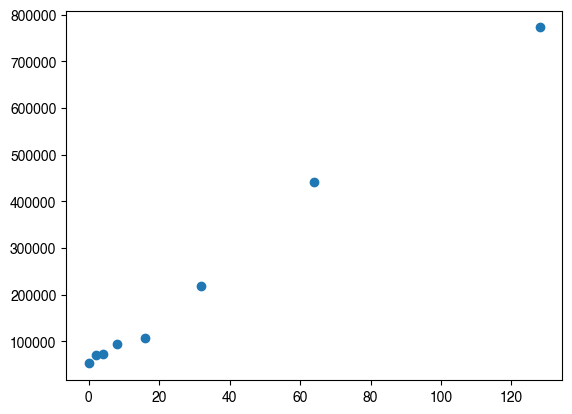

In [209]:
plt.scatter(arun_2021_multiplexed_S5_3['Reference'], arun_2021_multiplexed_S5_3['Rolling Ball Corrected Volume'])

## Arun Nucleic Acid Sensor 2016

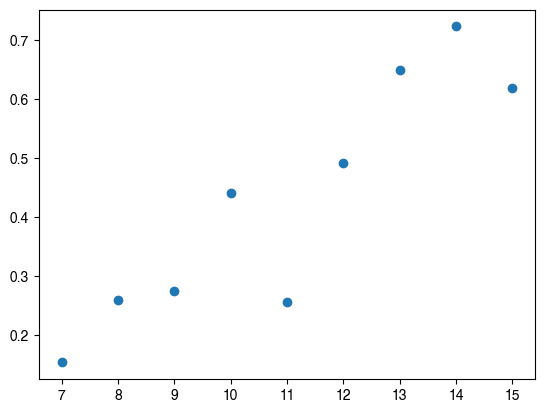

In [221]:
# CALCULATE FRACTION OF EACH THEN SCATTER PLOT....

plot_data = []
ref_data = []
for i in range(9):
    R1 = arun_2016_nucleic_acid_sensor.iloc[2*i]['Rolling Ball Corrected Volume']
    R2 = arun_2016_nucleic_acid_sensor.iloc[2*i+1]['Rolling Ball Corrected Volume']
    plot_data.append(R1/(R2+R1))
    ref_data.append(15-i)
plt.scatter(ref_data, plot_data)

## Arun Miracles 2019

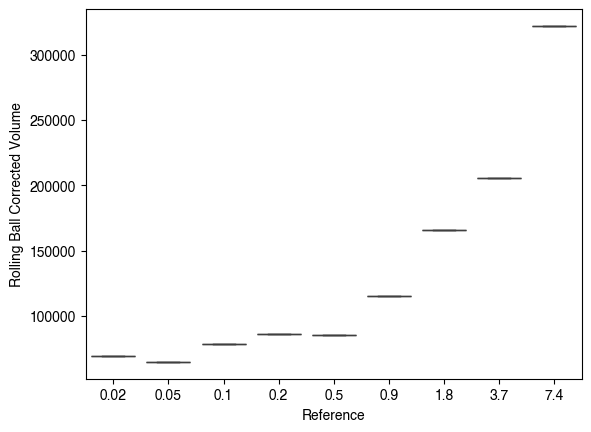

In [230]:
# DO NOT INCLUDE IN RESULTS - ARUN'S ANALYSIS CANNOT BE REPLICATED

# FIG 2B


fig, ax1 = plt.subplots()

full_df = pd.concat([miracles_2b_1, miracles_2b_1, miracles_2b_1], ignore_index=True)

b = sns.boxplot(data=full_df[full_df['Reference']>0], x='Reference', y='Rolling Ball Corrected Volume')
# b = sns.boxplot(data=full_df[full_df['Reference']>0.1], x='Reference', y='Raw Volume')

# 0.5/0.2 doesn't match paper but otherwise ok

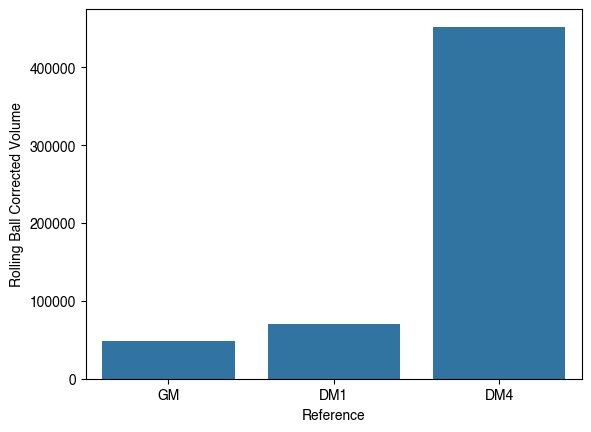

In [238]:
# FIG 3F

fig, ax1 = plt.subplots()

b = sns.barplot(data=miracles_3f, x='Reference', y='Rolling Ball Corrected Volume')
# low value does not match paper - probably something different was done for blank values.